In [1]:
import csv
import copy
import datetime
import iso639
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from babel.languages import get_official_languages

In [2]:
df_papers = pd.read_csv(
    'in_lang_docs_all_bibitems.tsv',
    header=None,
    names = ['lang', 'uuid', 'citing_mid', 'cited_mid', 'citing_aid', 'cited_aid', 'bibitem_str'],
    sep='\t',
    low_memory=False,
    quoting=csv.QUOTE_NONE
)
df_papers = df_papers[df_papers.citing_mid.notna()]
df_papers.citing_mid = df_papers.citing_mid.astype(int)

In [3]:
len(df_papers.citing_mid.unique())

16300

In [4]:
df_mag_paa = pd.read_csv(
    'mag_202012/PaperAuthorAffiliations_filtered.txt',
    header=None,
    names = ['paperid', 'authorid', 'affiliationid',
             'authorsequencenumber', 'originalauthor', 'originalaffiliation'],
    sep='\t',
    low_memory=False,
    quoting=csv.QUOTE_NONE
)
df_mag_paa = df_mag_paa[df_mag_paa.affiliationid.notna()]
df_mag_paa.affiliationid = df_mag_paa.affiliationid.astype(int)

In [5]:
df_mag_a = pd.read_csv(
    'mag_202012/Affiliations.txt',
    header=None,
    names = ['affiliationid', 'rank', 'normalizedname',
             'displayname', 'gridid', 'officialpage',
             'wikipage', 'papercount', 'paperfamilycount',
             'citationcode', 'iso3166code', 'latitude', 'longidute',
             'createddate'],
    sep='\t',
    low_memory=False,
    quoting=csv.QUOTE_NONE
)
df_mag_a.affiliationid = df_mag_a.affiliationid.astype(int)

In [6]:
cit_lang_to_country_dict = dict()
for mid in df_papers.citing_mid.unique():
    langs = [x for x in df_papers[df_papers.citing_mid == mid].lang.unique() if type(x) == str]
    try:
        aff_id = list(df_mag_paa[df_mag_paa.paperid == mid].affiliationid)[0]
        aff_code = list(df_mag_a[df_mag_a.affiliationid == aff_id].iso3166code)[0]
        for lang in langs:
            if lang not in cit_lang_to_country_dict:
                cit_lang_to_country_dict[lang] = dict()
            if aff_code not in cit_lang_to_country_dict[lang]:
                cit_lang_to_country_dict[lang][aff_code] = 0
            cit_lang_to_country_dict[lang][aff_code] += 1
    except IndexError:
        continue

In [7]:
s_haystack = set(df_mag_paa.paperid)
s_needles = set(df_papers.citing_mid)
print(
    '{} papers w/ data\n{} papers searched\n{} overlap'.format(
        len(s_haystack),
        len(s_needles),
        len(s_haystack.intersection(s_needles))
    )
)

7522 papers w/ data
16300 papers searched
7522 overlap


In [8]:
import pprint
pprint.pprint(cit_lang_to_country_dict)

{'armenian': {'AM': 1, 'US': 1},
 'bulgarian': {'BE': 1, 'BG': 7, 'HU': 1, 'RU': 1},
 'catalan': {'ES': 3},
 'chinese': {nan: 5,
             'AT': 1,
             'AU': 8,
             'BE': 2,
             'CA': 14,
             'CH': 5,
             'CN': 377,
             'CO': 1,
             'DE': 11,
             'DK': 2,
             'EG': 2,
             'ES': 1,
             'FI': 3,
             'FR': 8,
             'GB': 13,
             'GR': 2,
             'HK': 8,
             'HR': 1,
             'HU': 2,
             'IL': 4,
             'IN': 4,
             'IR': 4,
             'IT': 5,
             'JP': 2,
             'KP': 2,
             'KR': 6,
             'MA': 1,
             'MX': 3,
             'NL': 1,
             'PL': 3,
             'RU': 3,
             'SE': 1,
             'SG': 3,
             'SI': 1,
             'SK': 1,
             'TH': 1,
             'TW': 9,
             'US': 169},
 'cremonese': {'DE': 1},
 'croatian': {'ES': 1, '

In [10]:
df_papers.lang.unique()

array([nan, 'japanese', 'german', 'chinese', 'russian', 'ukrainian',
       'hungarian', 'bulgarian', 'french', 'polish', 'farsi',
       'portuguese', 'romanian', 'italian', 'croatian', 'slovenian',
       'english', 'armenian', 'czech', 'spanish', 'turkish', 'dutch',
       'greek', 'slovak', 'korean', 'icelandic', 'latin', 'catalan',
       'danish', 'swedish', 'hindi', 'finnish', 'hebrew', 'serbian',
       'norwegian', 'vietnamese', 'macedonian', 'sanskrit', 'marathi',
       'georgian', 'cremonese', 'latvian', 'indonesian', 'estonian',
       'esperanto', 'belarusian'], dtype=object)

In [11]:
aff_countries_by_count = list(df_mag_a.iso3166code.value_counts().keys())
aff_countries_by_count

['US',
 'GB',
 'IN',
 'JP',
 'CA',
 'CN',
 'DE',
 'AU',
 'FR',
 'KR',
 'RU',
 'BR',
 'IT',
 'NL',
 'CH',
 'TW',
 'ES',
 'PK',
 'NO',
 'TR',
 'BE',
 'SE',
 'IR',
 'IE',
 'PH',
 'DK',
 'MX',
 'ZA',
 'AT',
 'PL',
 'BD',
 'IL',
 'FI',
 'SG',
 'UA',
 'TH',
 'MY',
 'NG',
 'NZ',
 'GR',
 'ID',
 'HK',
 'PT',
 'AR',
 'CZ',
 'CO',
 'EG',
 'VN',
 'UG',
 'SA',
 'AE',
 'KE',
 'HU',
 'IQ',
 'GH',
 'RO',
 'BG',
 'CL',
 'LK',
 'TZ',
 'NP',
 'JO',
 'PR',
 'EE',
 'HR',
 'ET',
 'PE',
 'SI',
 'DZ',
 'CY',
 'LB',
 'LU',
 'VE',
 'SD',
 'KW',
 'SK',
 'LT',
 'CU',
 'RS',
 'LV',
 'ZW',
 'MM',
 'BA',
 'KZ',
 'UZ',
 'AZ',
 'TN',
 'GE',
 'AL',
 'BH',
 'AM',
 'BY',
 'EC',
 'CM',
 'QA',
 'SY',
 'UY',
 'MK',
 'IS',
 'KH',
 'LY',
 'OM',
 'YE',
 'PA',
 'JM',
 'KG',
 'MD',
 'MA',
 'DO',
 'ZM',
 'CD',
 'MO',
 'MU',
 'MN',
 'MW',
 'CR',
 'BW',
 'PG',
 'TT',
 'GT',
 'FJ',
 'PY',
 'BM',
 'TJ',
 'CI',
 'BN',
 'MT',
 'BO',
 'AF',
 'SN',
 'SO',
 'ME',
 'SV',
 'ML',
 'SL',
 'GM',
 'BJ',
 'NI',
 'KN',
 'LA',
 'LI',
 'MC',
 'MZ',

In [12]:
# Most common language per country

lang_to_countries = {}

# https://unicode-org.github.io/cldr-staging/charts/latest/supplemental/territory_language_information.html
for country in aff_countries_by_count:
    lang = get_official_languages(country, de_facto=True)[0].split('_')[0]
    if lang not in lang_to_countries:
        lang_to_countries[lang] = []
    lang_to_countries[lang].append(country)
    print('{} - {}'.format(
        country,
        lang
    ))

US - en
GB - en
IN - hi
JP - ja
CA - en
CN - zh
DE - de
AU - en
FR - fr
KR - ko
RU - ru
BR - pt
IT - it
NL - nl
CH - de
TW - zh
ES - es
PK - ur
NO - nb
TR - tr
BE - nl
SE - sv
IR - fa
IE - en
PH - en
DK - da
MX - es
ZA - en
AT - de
PL - pl
BD - bn
IL - he
FI - fi
SG - en
UA - uk
TH - th
MY - ms
NG - en
NZ - en
GR - el
ID - id
HK - zh
PT - pt
AR - es
CZ - cs
CO - es
EG - ar
VN - vi
UG - sw
SA - ar
AE - ar
KE - sw
HU - hu
IQ - ar
GH - en
RO - ro
BG - bg
CL - es
LK - si
TZ - sw
NP - ne
JO - ar
PR - es
EE - et
HR - hr
ET - am
PE - es
SI - sl
DZ - ar
CY - el
LB - ar
LU - fr
VE - es
SD - en
KW - ar
SK - sk
LT - lt
CU - es
RS - sr
LV - lv
ZW - sn
MM - my
BA - bs
KZ - ru
UZ - uz
AZ - az
TN - ar
GE - ka
AL - sq
BH - ar
AM - hy
BY - be
EC - es
CM - fr
QA - ar
SY - ar
UY - es
MK - mk
IS - is
KH - km
LY - ar
OM - ar
YE - ar
PA - es
JM - en
KG - ky
MD - ro
MA - ar
DO - es
ZM - en
CD - fr
MO - zh
MU - en
MN - mn
MW - ny
CR - es
BW - en
PG - tpi
TT - en
GT - es
FJ - en
PY - gn
BM - en
TJ - tg
CI - fr

In [13]:
# Language name to iso code

for lang in df_papers.lang.unique():
    try:
        print('{} - {}'.format(lang, iso639.to_iso639_1(lang)))
    except iso639.NonExistentLanguageError:
        print('{} - #####'.format(lang))

nan - #####
japanese - ja
german - de
chinese - zh
russian - ru
ukrainian - uk
hungarian - hu
bulgarian - bg
french - fr
polish - pl
farsi - fa
portuguese - pt
romanian - ro
italian - it
croatian - hr
slovenian - sl
english - en
armenian - hy
czech - cs
spanish - es
turkish - tr
dutch - nl
greek - el
slovak - sk
korean - ko
icelandic - is
latin - la
catalan - ca
danish - da
swedish - sv
hindi - hi
finnish - fi
hebrew - he
serbian - sr
norwegian - no
vietnamese - vi
macedonian - mk
sanskrit - sa
marathi - mr
georgian - ka
cremonese - #####
latvian - lv
indonesian - id
estonian - et
esperanto - eo
belarusian - be


In [14]:
def affiliation_countries_by_mag_paper_id(mid):
    author_affiliations = list(df_mag_paa[df_mag_paa.paperid == mid].affiliationid)
    aff_codes = []
    for auth_aff in author_affiliations:
        aff_codes.extend(list(df_mag_a[df_mag_a.affiliationid == auth_aff].iso3166code))
    if len(aff_codes) > 0:
        return aff_codes
    else:
        return np.nan

for mid in df_papers.citing_mid.unique()[:10]:
    print(affiliation_countries_by_mag_paper_id(mid))

['JP']
nan
['US']
nan
['IN', 'IN', 'IN']
['CA', 'CA']
['GB', 'GB']
['JP', 'JP', 'JP']
nan
nan


In [15]:
def lang_to_iso(lang):
    if type(lang) != str:
        return np.nan
    try:
        code = iso639.to_iso639_1(lang)
    except iso639.NonExistentLanguageError:
        if lang == 'cremonese':
            code = 'lmo'   # approximate dialect to closest language with ISO code
        else:
            code = '?'
    return code

{lang_to_iso(k): v for k, v in df_papers.lang.value_counts().to_dict().items()}

{'ru': 21142,
 'zh': 2204,
 'ja': 1685,
 'de': 1123,
 'fr': 857,
 'uk': 780,
 'pl': 378,
 'hu': 292,
 'it': 185,
 'en': 145,
 'pt': 145,
 'es': 140,
 'ro': 101,
 'cs': 88,
 'bg': 64,
 'el': 52,
 'sk': 45,
 'nl': 40,
 'da': 35,
 'ko': 35,
 'sr': 31,
 'tr': 23,
 'hr': 14,
 'he': 14,
 'fi': 14,
 'la': 13,
 'vi': 10,
 'fa': 9,
 'ca': 8,
 'no': 6,
 'sv': 5,
 'sl': 5,
 'is': 4,
 'hy': 4,
 'mk': 2,
 'sa': 2,
 'ka': 2,
 'hi': 1,
 'be': 1,
 'mr': 1,
 'et': 1,
 'lmo': 1,
 'eo': 1,
 'id': 1,
 'lv': 1}

In [16]:
ref_lang_to_auth_aff_matrix_column_labels = []
ref_lang_to_auth_aff_matrix_row_labels = []

for lang in df_papers.lang.value_counts().keys()[:11]:
    lang_code = lang_to_iso(lang)
    if lang_code == 'en':
        continue  # tie break between pt and en
    country_codes = lang_to_countries[lang_code]
    print('{} -> {}'.format(lang_code, country_codes))
    
    ref_lang_to_auth_aff_matrix_column_labels.extend(country_codes)
    ref_lang_to_auth_aff_matrix_row_labels.append(lang_code)

# add English speaking countries to observation
ref_lang_to_auth_aff_matrix_column_labels.extend(lang_to_countries['en'])

ru -> ['RU', 'KZ']
zh -> ['CN', 'TW', 'HK', 'MO']
ja -> ['JP']
de -> ['DE', 'CH', 'AT', 'LI']
fr -> ['FR', 'LU', 'CM', 'CD', 'CI', 'ML', 'BJ', 'MC', 'GF', 'TD', 'NC', 'NE', 'GA', 'CG', 'TG', 'SC', 'BF', 'GN', 'PF', 'RE']
uk -> ['UA']
pl -> ['PL']
hu -> ['HU']
it -> ['IT', 'VA']
pt -> ['BR', 'PT', 'MZ', 'AO', 'GW', 'CV']


In [17]:
df_ref_lang_to_auth_aff_matrix = pd.DataFrame(
    columns=ref_lang_to_auth_aff_matrix_column_labels,
    index=ref_lang_to_auth_aff_matrix_row_labels
).fillna(0)

df_ref_lang_to_auth_aff_matrix

,RU,KZ,CN,TW,HK,MO,JP,DE,CH,AT,...,DM,MP,GD,LC,SZ,MH,VC,BS,GI,LR
ru,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ja,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
de,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
uk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
it,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# tally up references to a language by an author from a coutry with some (de facto) primary language
for idx, ref in df_papers[df_papers.lang.notna()].iterrows():
    lang_code = lang_to_iso(ref.lang)
    country_codes = affiliation_countries_by_mag_paper_id(ref.citing_mid)
    if type(country_codes) == list:
        for country_code in country_codes:
            if (lang_code in df_ref_lang_to_auth_aff_matrix.index
                and country_code in df_ref_lang_to_auth_aff_matrix.columns):
                df_ref_lang_to_auth_aff_matrix.at[lang_code, country_code] += 1

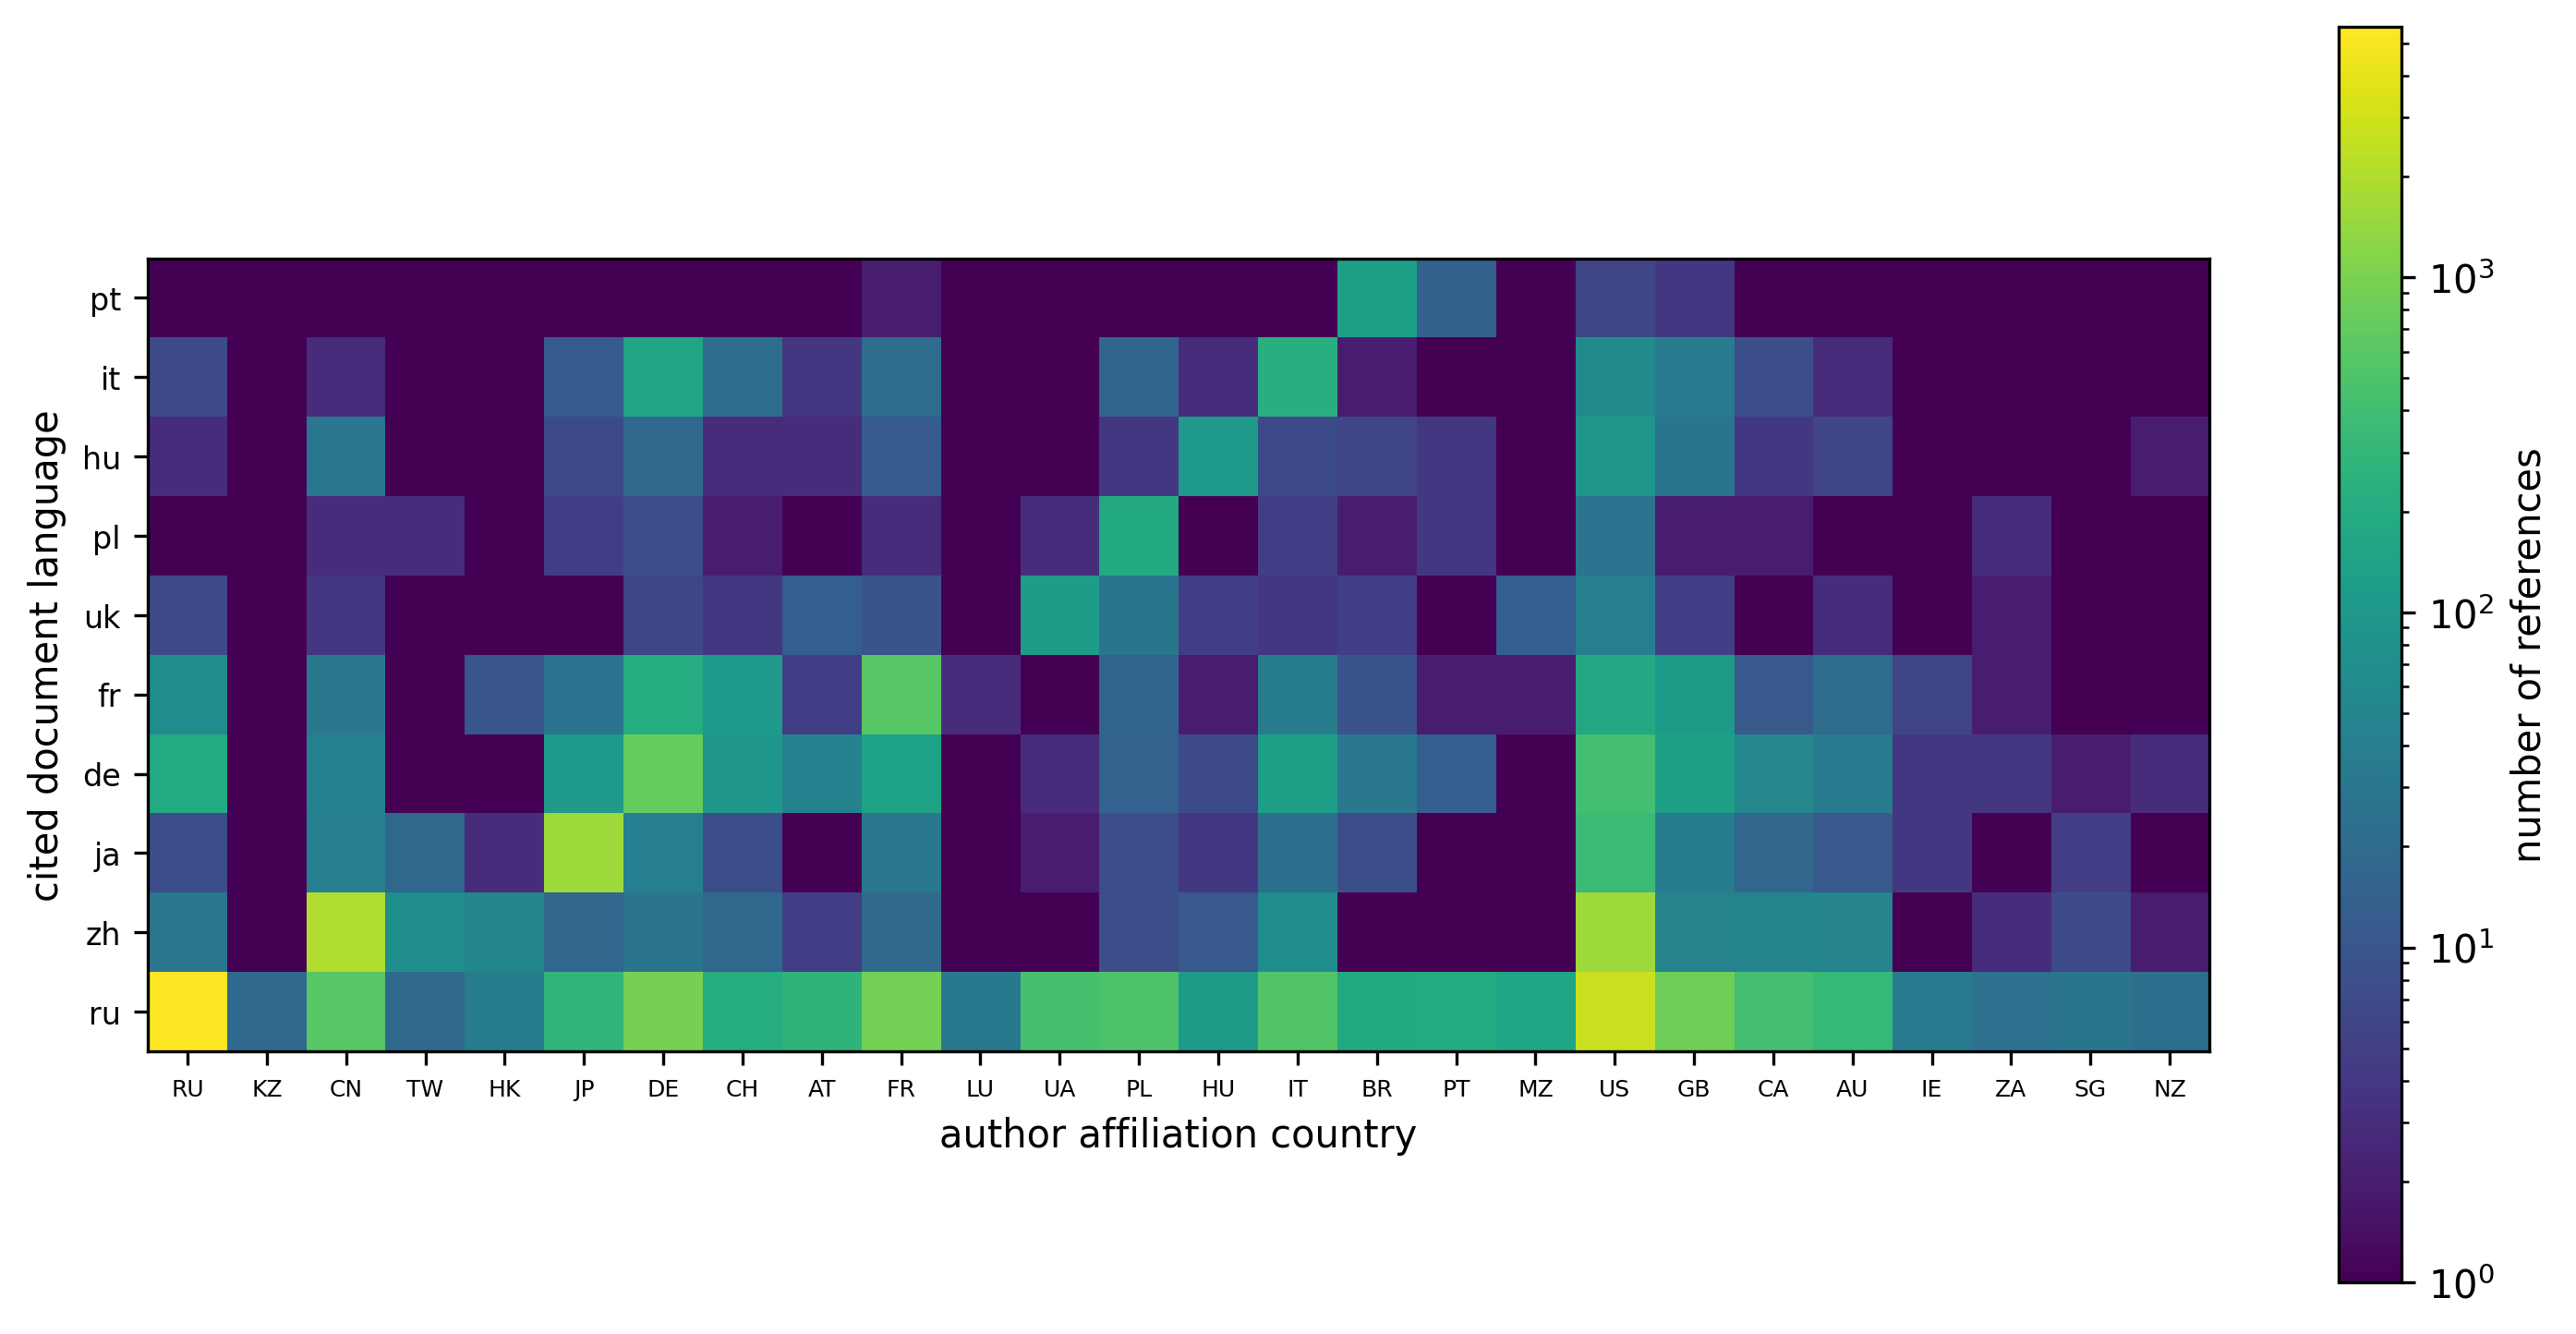

In [19]:
df_rltaam_filtered = df_ref_lang_to_auth_aff_matrix.loc[:, (df_ref_lang_to_auth_aff_matrix.sum(axis=0) >= 5)]

my_cmap = copy.copy(matplotlib.cm.get_cmap('viridis')) # copy the default cmap
my_cmap.set_bad(my_cmap.colors[0])

fig=plt.figure(figsize=(12, 6), dpi=300, facecolor='w', edgecolor='k')
plt.imshow(
    df_rltaam_filtered,
    norm=colors.LogNorm(),
    interpolation='none', 
    cmap=my_cmap,
    origin='lower',
)
plt.yticks(np.arange(0, len(df_rltaam_filtered.index), 1), df_rltaam_filtered.index, fontsize=8)
plt.xticks(np.arange(0, len(df_rltaam_filtered.columns), 1), df_rltaam_filtered.columns, fontsize=6)
plt.colorbar(label='number of references')
plt.xlabel('author affiliation country')
plt.ylabel('cited document language')
plt.show()

In [20]:
df_ref_lang_to_auth_aff_matrix.loc[:, (df_ref_lang_to_auth_aff_matrix.sum(axis=0) >= 1)]

,RU,KZ,CN,TW,HK,MO,JP,DE,CH,AT,...,CA,AU,IE,PH,ZA,SG,NG,NZ,JM,SZ
ru,5580,19,587,19,37,1,280,942,212,273,...,419,328,36,4,25,29,1,24,2,4
zh,30,0,1981,74,53,1,17,28,18,5,...,49,47,0,0,3,7,3,2,0,0
ja,8,0,41,18,3,0,1603,42,8,1,...,17,11,4,0,0,5,0,1,0,0
de,192,1,45,1,0,0,102,726,95,45,...,55,35,4,0,4,2,0,3,1,0
fr,66,0,32,0,10,0,27,212,103,5,...,11,22,6,0,2,0,0,1,0,0
uk,7,0,4,0,0,0,0,6,4,13,...,1,3,0,0,2,0,0,0,0,0
pl,1,0,3,3,0,0,5,8,2,0,...,2,0,0,0,3,0,0,0,0,0
hu,3,0,30,0,0,0,7,19,3,3,...,4,6,0,0,1,0,0,2,0,0
it,7,0,3,0,0,0,12,156,22,4,...,8,3,0,0,1,0,0,1,0,0
pt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
country_langs = ref_lang_to_auth_aff_matrix_row_labels + ['en']

df_lang_to_lang_matrix = pd.DataFrame(
    columns=country_langs,
    index=ref_lang_to_auth_aff_matrix_row_labels
).fillna(0)

for lang in country_langs:
    df_lang_to_lang_matrix[lang] = df_ref_lang_to_auth_aff_matrix[lang_to_countries[lang]].sum(axis=1)
    
df_lang_to_lang_matrix

,ru,zh,ja,de,fr,uk,pl,hu,it,pt,en
ru,5599,644,280,1427,968,459,501,110,542,551,4535
zh,30,2109,17,51,20,0,8,11,66,0,1732
ja,8,62,1603,51,32,2,8,4,24,9,437
de,193,46,102,866,151,3,15,7,130,45,669
fr,66,42,27,320,593,0,16,2,39,13,334
uk,7,4,0,23,9,119,29,5,4,19,52
pl,1,6,5,10,3,3,188,1,5,7,34
hu,3,30,7,25,12,0,4,105,7,11,139
it,7,3,12,182,21,0,16,3,223,2,112
pt,0,0,0,0,2,0,1,0,0,149,10


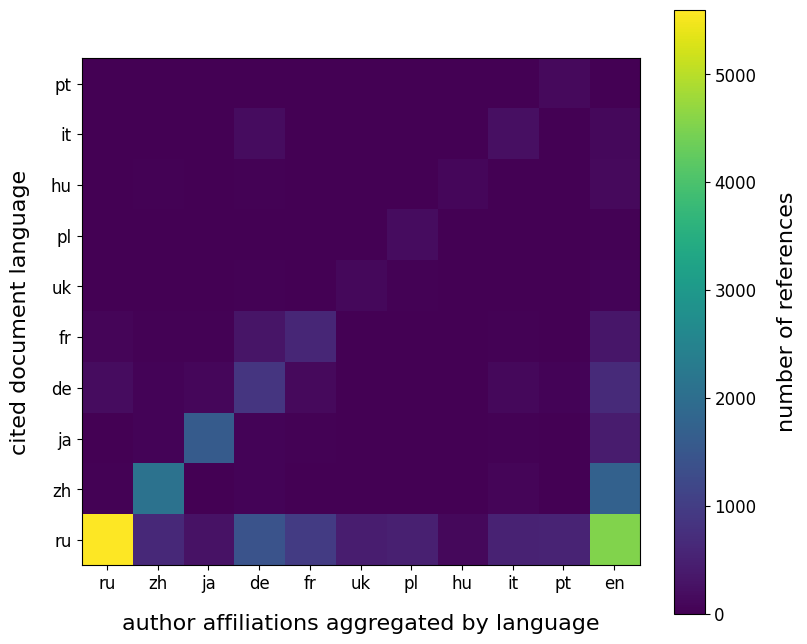

In [22]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig=plt.figure(figsize=(9,8), dpi= 100, facecolor='w', edgecolor='k')
im = plt.imshow(
    df_lang_to_lang_matrix,
    interpolation='none',
    #norm=colors.LogNorm(),
    cmap=my_cmap,
    origin='lower',
)
plt.yticks(np.arange(0, len(df_lang_to_lang_matrix.index), 1), df_lang_to_lang_matrix.index, fontsize=12)
plt.xticks(np.arange(0, len(df_lang_to_lang_matrix.columns), 1), df_lang_to_lang_matrix.columns, fontsize=12)
cbar = plt.colorbar()
cbar.set_label(label='number of references', fontsize=16, labelpad=15)
cbar.ax.tick_params(labelsize=12) 
plt.xlabel('author affiliations aggregated by language', fontsize=16, labelpad=15)
plt.ylabel('cited document language', fontsize=16, labelpad=15)
plt.savefig('citlang_to_author_aff_absolute.pdf')
plt.show()

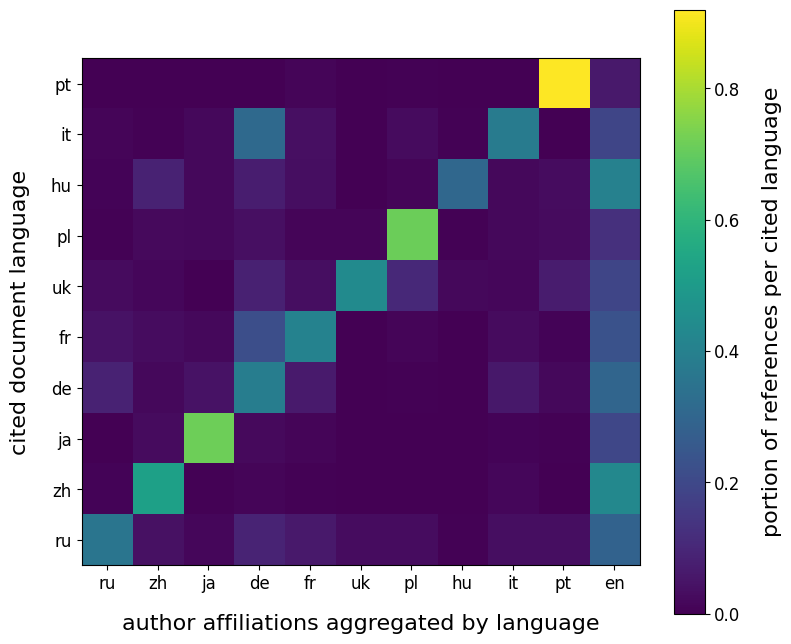

In [23]:
df_lang_to_lang_matrix_normalized = df_lang_to_lang_matrix.div(df_lang_to_lang_matrix.sum(axis=1), axis=0)

fig=plt.figure(figsize=(9,8), dpi= 100, facecolor='w', edgecolor='k')
plt.imshow(
    df_lang_to_lang_matrix_normalized,
    interpolation='none', 
    cmap=my_cmap,
    origin='lower',
)
plt.yticks(
    np.arange(0, len(df_lang_to_lang_matrix_normalized.index), 1),
    df_lang_to_lang_matrix_normalized.index,
    fontsize=12
    )
plt.xticks(
    np.arange(0, len(df_lang_to_lang_matrix_normalized.columns), 1),
    df_lang_to_lang_matrix_normalized.columns,
    fontsize=12
)
cbar = plt.colorbar()
cbar.set_label(label='portion of references per cited language', fontsize=16, labelpad=15)
cbar.ax.tick_params(labelsize=12) 
plt.xlabel('author affiliations aggregated by language', fontsize=16, labelpad=15)
plt.ylabel('cited document language', fontsize=16, labelpad=15)
plt.savefig('citlang_to_author_aff_relative.pdf')
plt.show()